# The code below is a example notebook that was used as a starting point for KNN.
- Example notebook was taken from - https://github.com/rimo02/ML-Notebooks/blob/main/Supervised%20Learning/KNN.ipynb 
- Currently the code does not run on this notebook but on the GitHub link it shows the code working and each output.
- You can find the new notebook which is all my work located at the end of this example notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.datasets import load_iris

ModuleNotFoundError: No module named 'plotly'

In [ ]:
import opendatasets as od
dataset_url='https://www.kaggle.com/datasets/uciml/iris'
od.download(dataset_url)

In [ ]:
import os
data_dir = './iris'
os.listdir(data_dir)

In [ ]:
dataset=data_dir+'./Iris.csv'

In [ ]:

iris_df=pd.read_csv(dataset)
iris_df

In [ ]:
iris_df=iris_df.drop(columns=['Id'])
iris_df.head()

In [ ]:
iris_df.info()


In [ ]:
#Check for null values
iris_df.isna().sum()

In [ ]:
iris_df["SepalLengthCm"].hist()


In [ ]:
iris_df["PetalLengthCm"].hist()


In [ ]:
iris_df["SepalWidthCm"].hist()


In [ ]:
iris_df["PetalWidthCm"].hist()


In [ ]:
iris_df['Species'].value_counts()


In [ ]:
species=['Iris-setosa','Iris-versicolor','Iris-virginica']
color=['Blue','Orange','Red']
for i in range(3):
    x=iris_df[iris_df['Species']==species[i]]
#     print(x)
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],color=color[i],label=species[i])
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend()
plt.show()

In [ ]:

for i in range(3):
    x=iris_df[iris_df['Species']==species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],color=color[i],label=species[i])
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend()
plt.show()

In [ ]:
for i in range(3):
    x=iris_df[iris_df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],color=color[i],label=species[i])
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')
plt.legend()
plt.show()

In [ ]:
for i in range(3):
    x=iris_df[iris_df['Species']==species[i]]
    plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'],color=color[i],label=species[i])
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')
plt.legend()
plt.show()

In [ ]:
import seaborn as sns
sns.heatmap(iris_df.corr(),annot=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
iris_df['Species']=encoder.fit_transform(iris_df['Species'])
iris_df.head()

In [ ]:
Y=iris_df['Species']
X=iris_df.drop(columns=['Species'])
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)
print(x_train.shape,x_test.shape)

In [ ]:

from sklearn.linear_model import LogisticRegression
model1=LogisticRegression(max_iter=20000)
model1.fit(x_train,y_train)

In [ ]:
model1.coef_,model1.intercept_

In [ ]:
y_pred=model1.predict(x_test)


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("Accuracy Score=",model1.score(x_test,y_test))

In [ ]:
cf1=confusion_matrix(y_pred,y_test)
cf1

In [ ]:
print(classification_report(y_test,y_pred))


In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
model2=KNeighborsClassifier(n_neighbors=5)
model2.fit(x_train,y_train)

In [ ]:
# model2.predict(x_test)


In [ ]:
print("Acuuracy=",model2.score(x_test,y_test))


In [ ]:
print(classification_report(y_test,model2.predict(x_test)))


# This notebook here is a KNN for a diabetes dataset.
# Loading the dataset.
- The code is using the load_diabetes dataset taken from sklearn.datasets.
# How it works.
-
-
-
-
# What is it's purpose.
-
-
-
-
-
# How to use it.
-

In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Loading the dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name='target')

In [4]:
# Display the rows
print(X.head())
print(y.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  
0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64


In [5]:
# Info of the dataset
X.info()
X.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [6]:
# Checking for any null values
print(X.isna().sum())

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64


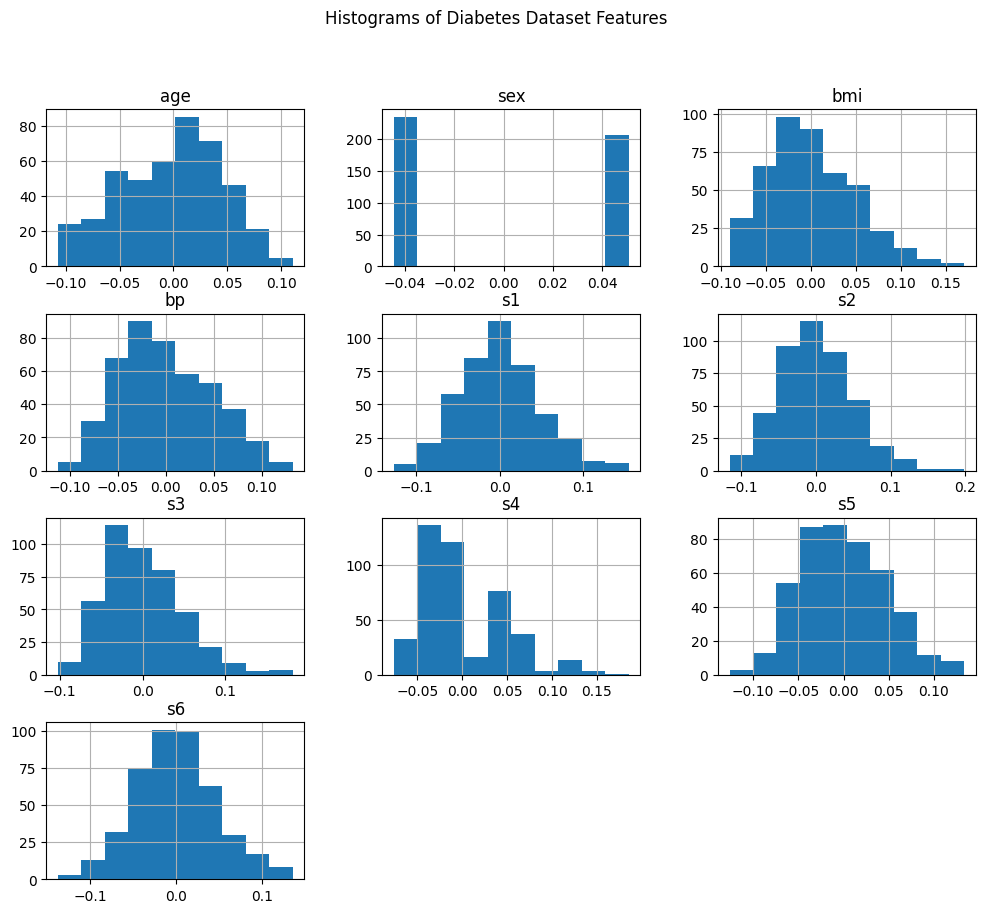

In [7]:
X.hist(figsize=(12, 10))
plt.suptitle("Histograms of Diabetes Dataset Features")
plt.show()

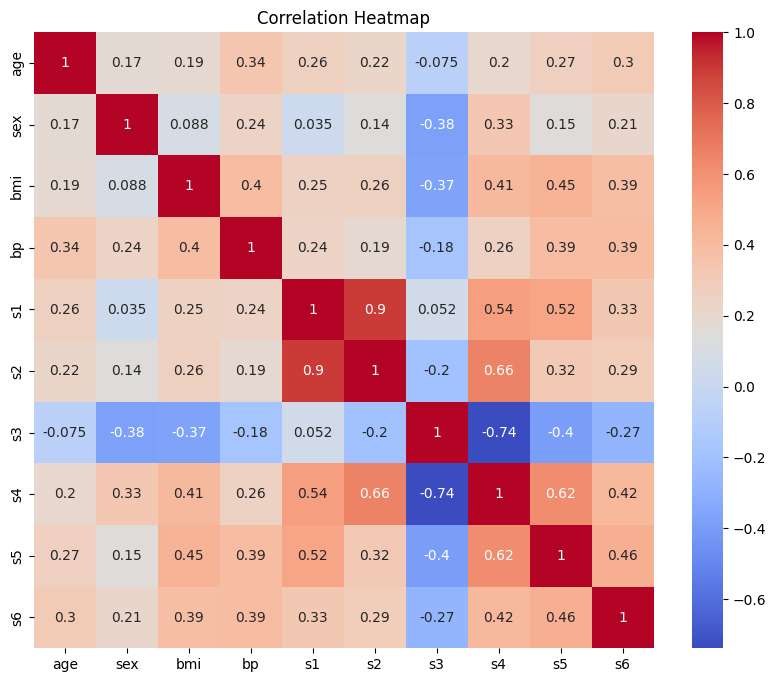

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  
0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi

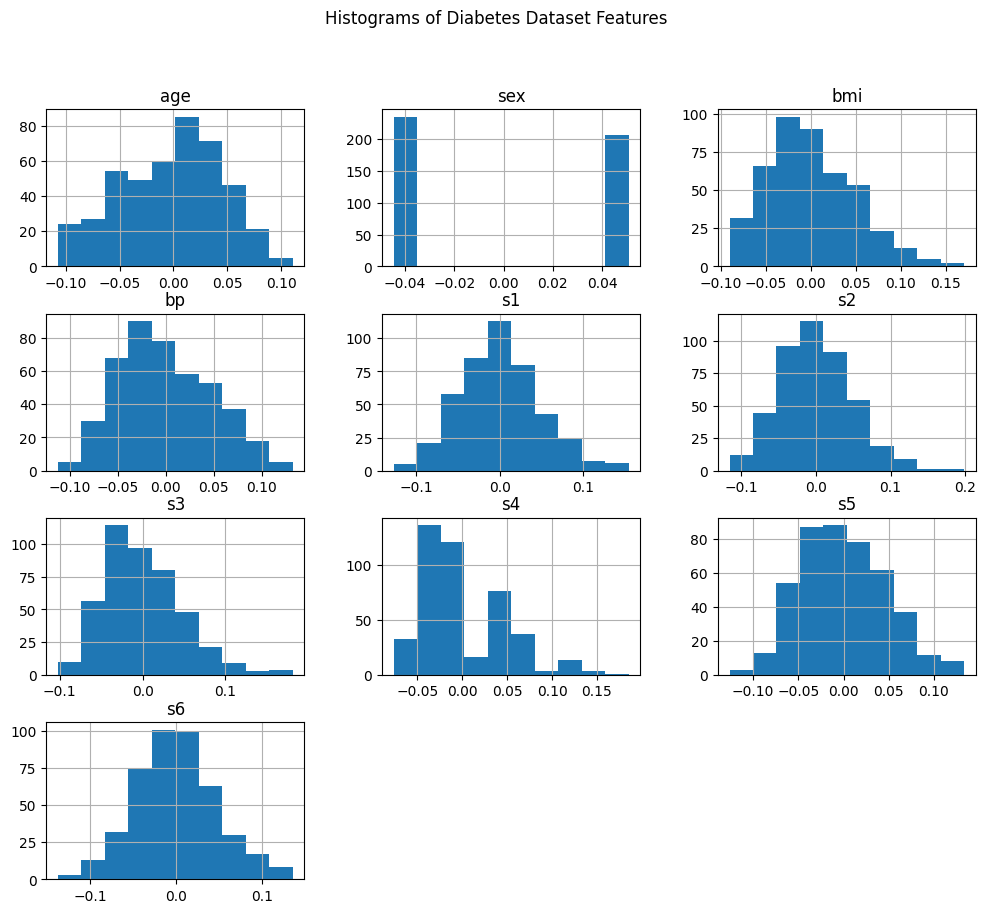

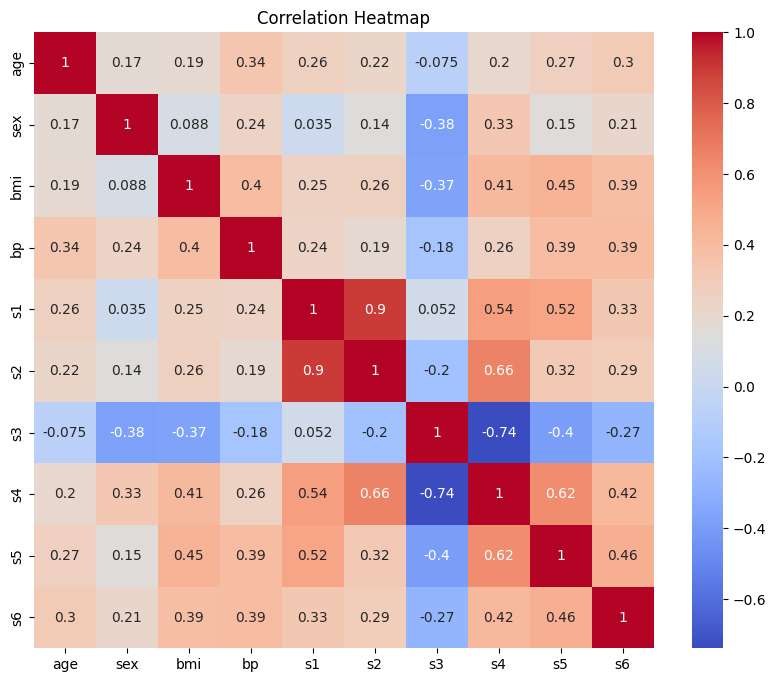

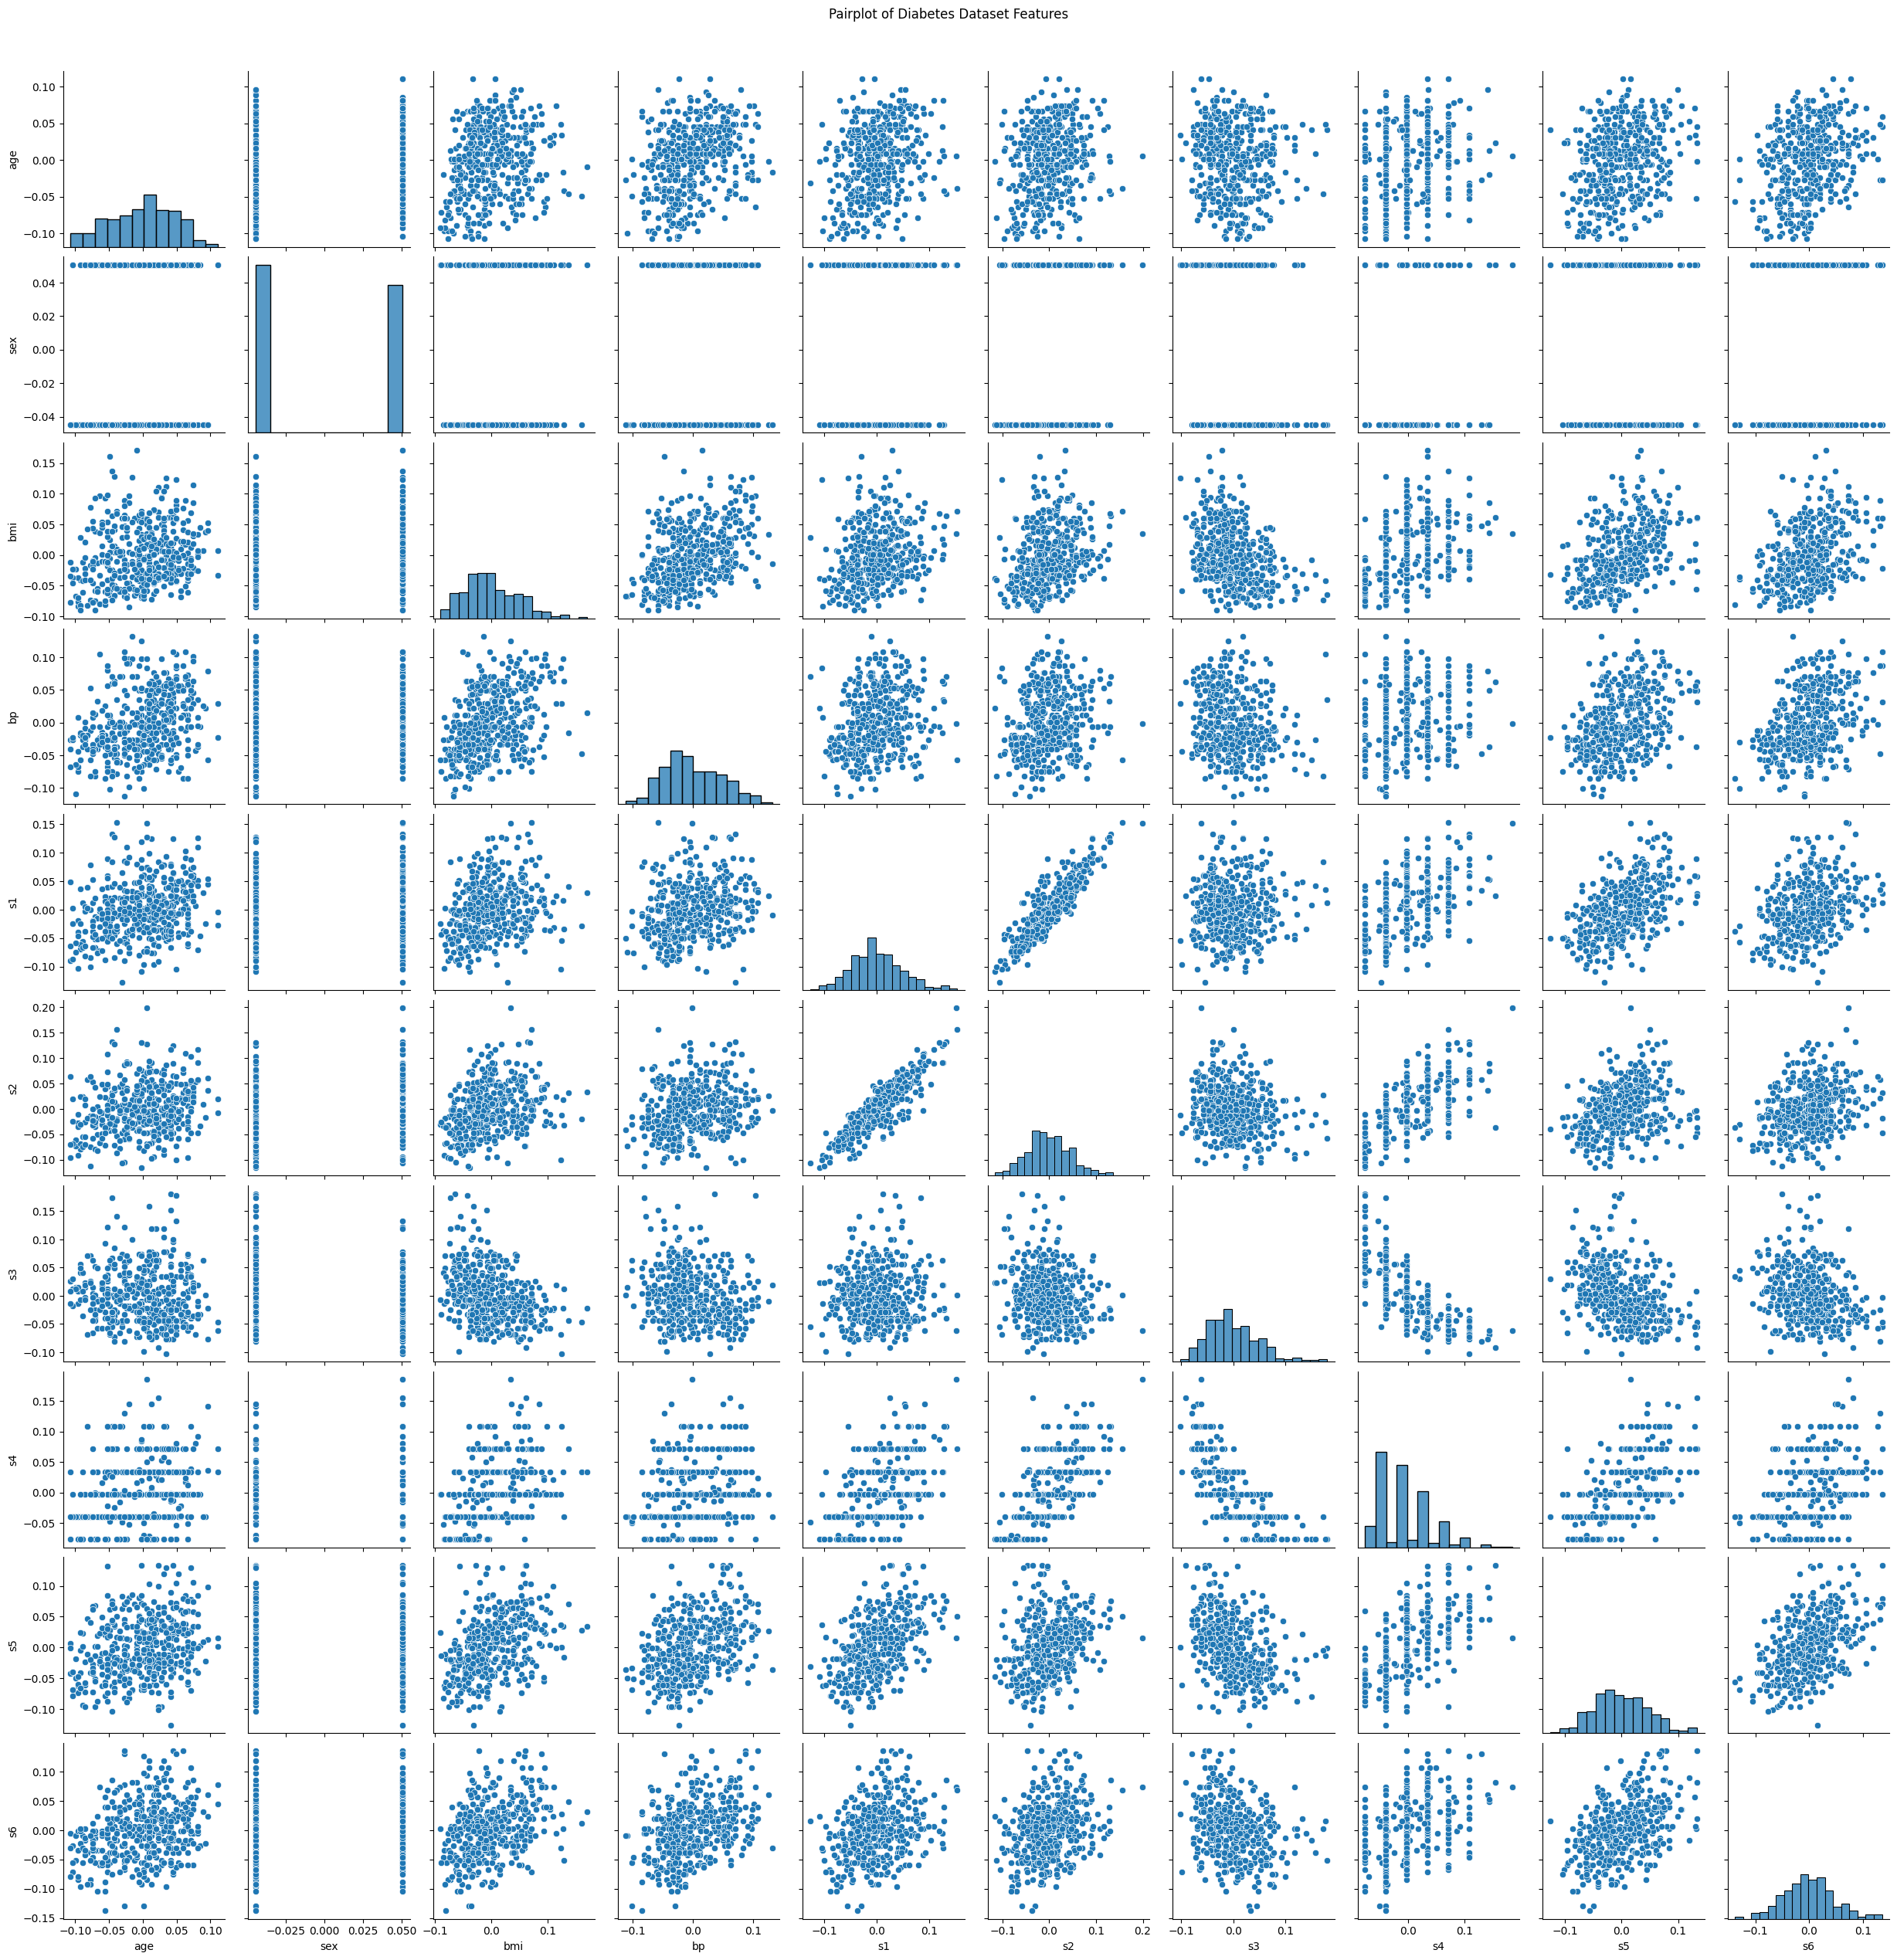

Mean Squared Error: 3060.166486486487
R^2 Score: 0.44659346214225026


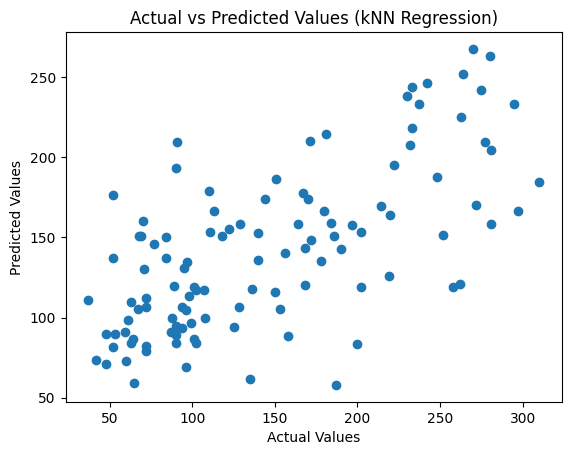

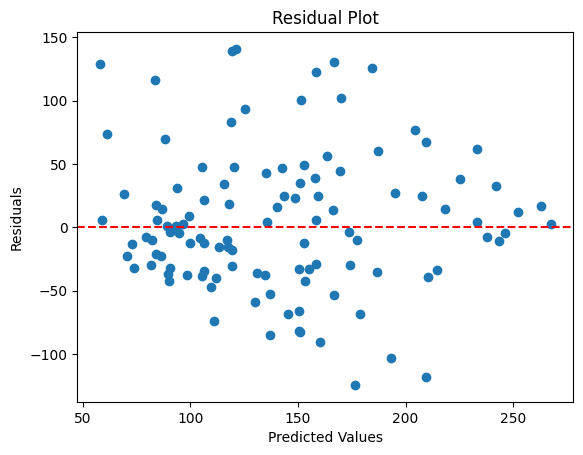

Enter the following features to predict diabetes progression:
Predicted Diabetes Progression: 266.00
Risk Level: High


C:\Users\Luka Brennan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [11]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name='target')

# Display the first few rows of the dataset
print(X.head())
print(y.head())

# Dataset information
X.info()
X.describe()

# Check for null values
print(X.isna().sum())

# Exploratory Data Analysis (EDA)
# Histograms for each feature
X.hist(figsize=(12, 10))
plt.suptitle("Histograms of Diabetes Dataset Features")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Pairplot for feature relationships
sns.pairplot(X)
plt.suptitle("Pairplot of Diabetes Dataset Features", y=1.02)
plt.show()

# Preprocessing: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# Model Training: K-Nearest Neighbors Regressor
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (kNN Regression)")
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Deployment Function for User Input
def predict_diabetes_progression():
    """
    Takes user input for the 10 features and predicts diabetes progression.
    """
    print("Enter the following features to predict diabetes progression:")
    age = float(input("Age: "))
    sex = float(input("Sex (0 for female, 1 for male): "))
    bmi = float(input("BMI: "))
    bp = float(input("Average Blood Pressure: "))
    s1 = float(input("Total Serum Cholesterol: "))
    s2 = float(input("Low-Density Lipoproteins (LDL): "))
    s3 = float(input("High-Density Lipoproteins (HDL): "))
    s4 = float(input("Total Cholesterol / HDL Ratio: "))
    s5 = float(input("Log of Serum Triglycerides Level: "))
    s6 = float(input("Blood Sugar Level: "))

    # Create a numpy array from the input
    input_data = np.array([age, sex, bmi, bp, s1, s2, s3, s4, s5, s6]).reshape(1, -1)

    # Standardize the input data
    input_scaled = scaler.transform(input_data)

    # Predict disease progression
    prediction = model.predict(input_scaled)
    print(f"Predicted Diabetes Progression: {prediction[0]:.2f}")

    # Risk assessment
    if prediction[0] < 100:
        print("Risk Level: Low")
    elif prediction[0] < 150:
        print("Risk Level: Moderate")
    else:
        print("Risk Level: High")

# Example usage of the deployment function
predict_diabetes_progression()

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  
0    2
1    0
2    1
3    2
4    1
Name: target, dtype: category
Categories (3, int64): [0 < 1 < 2]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    

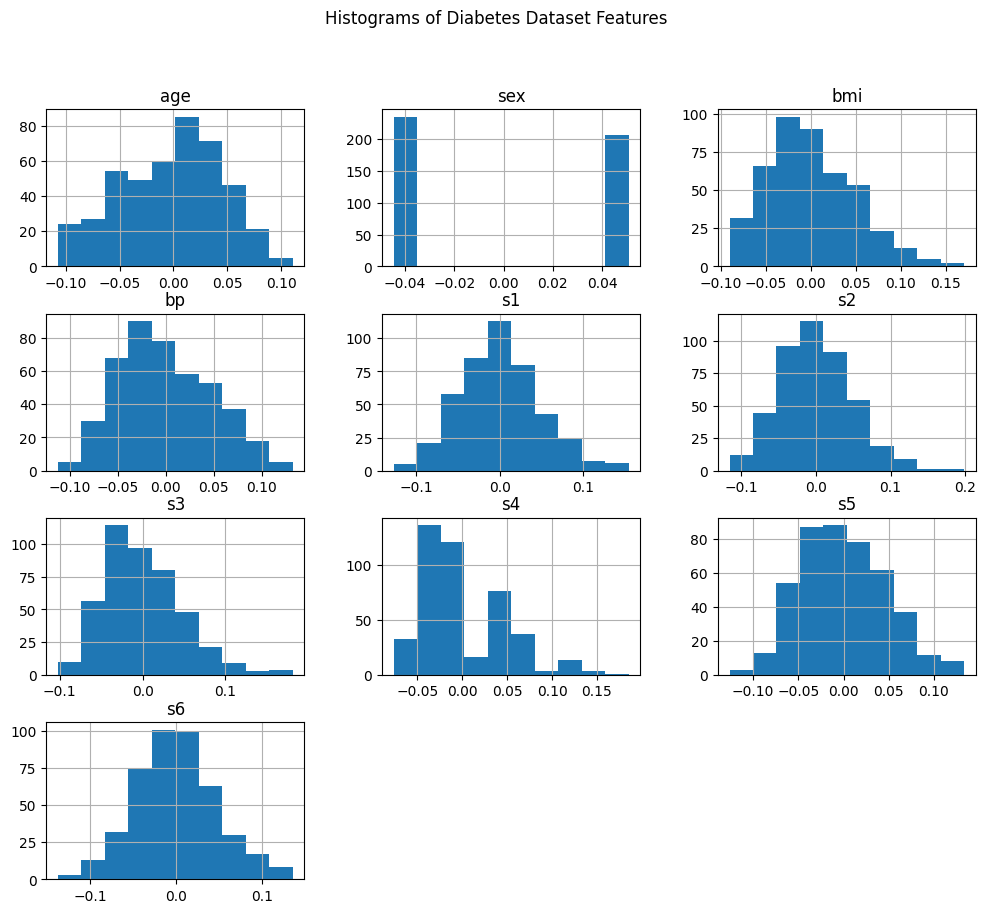

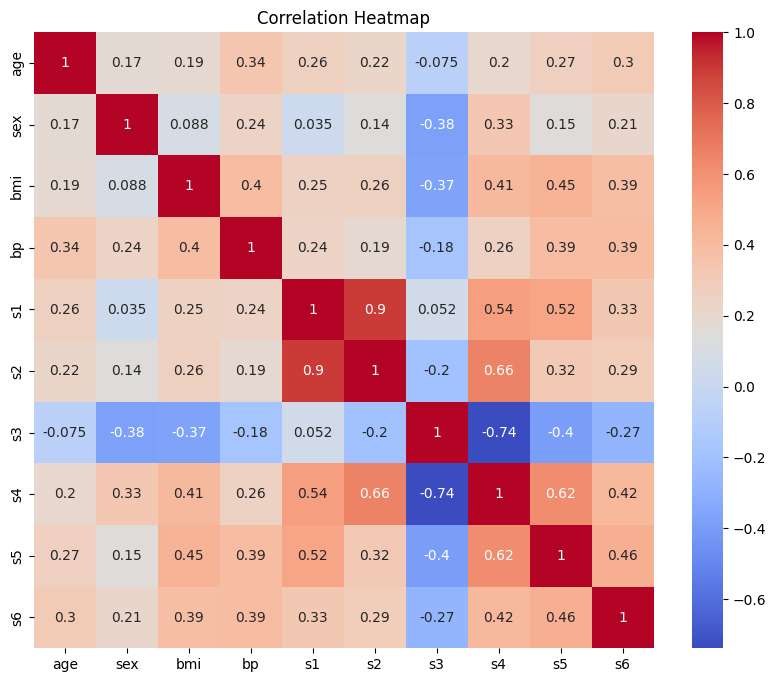

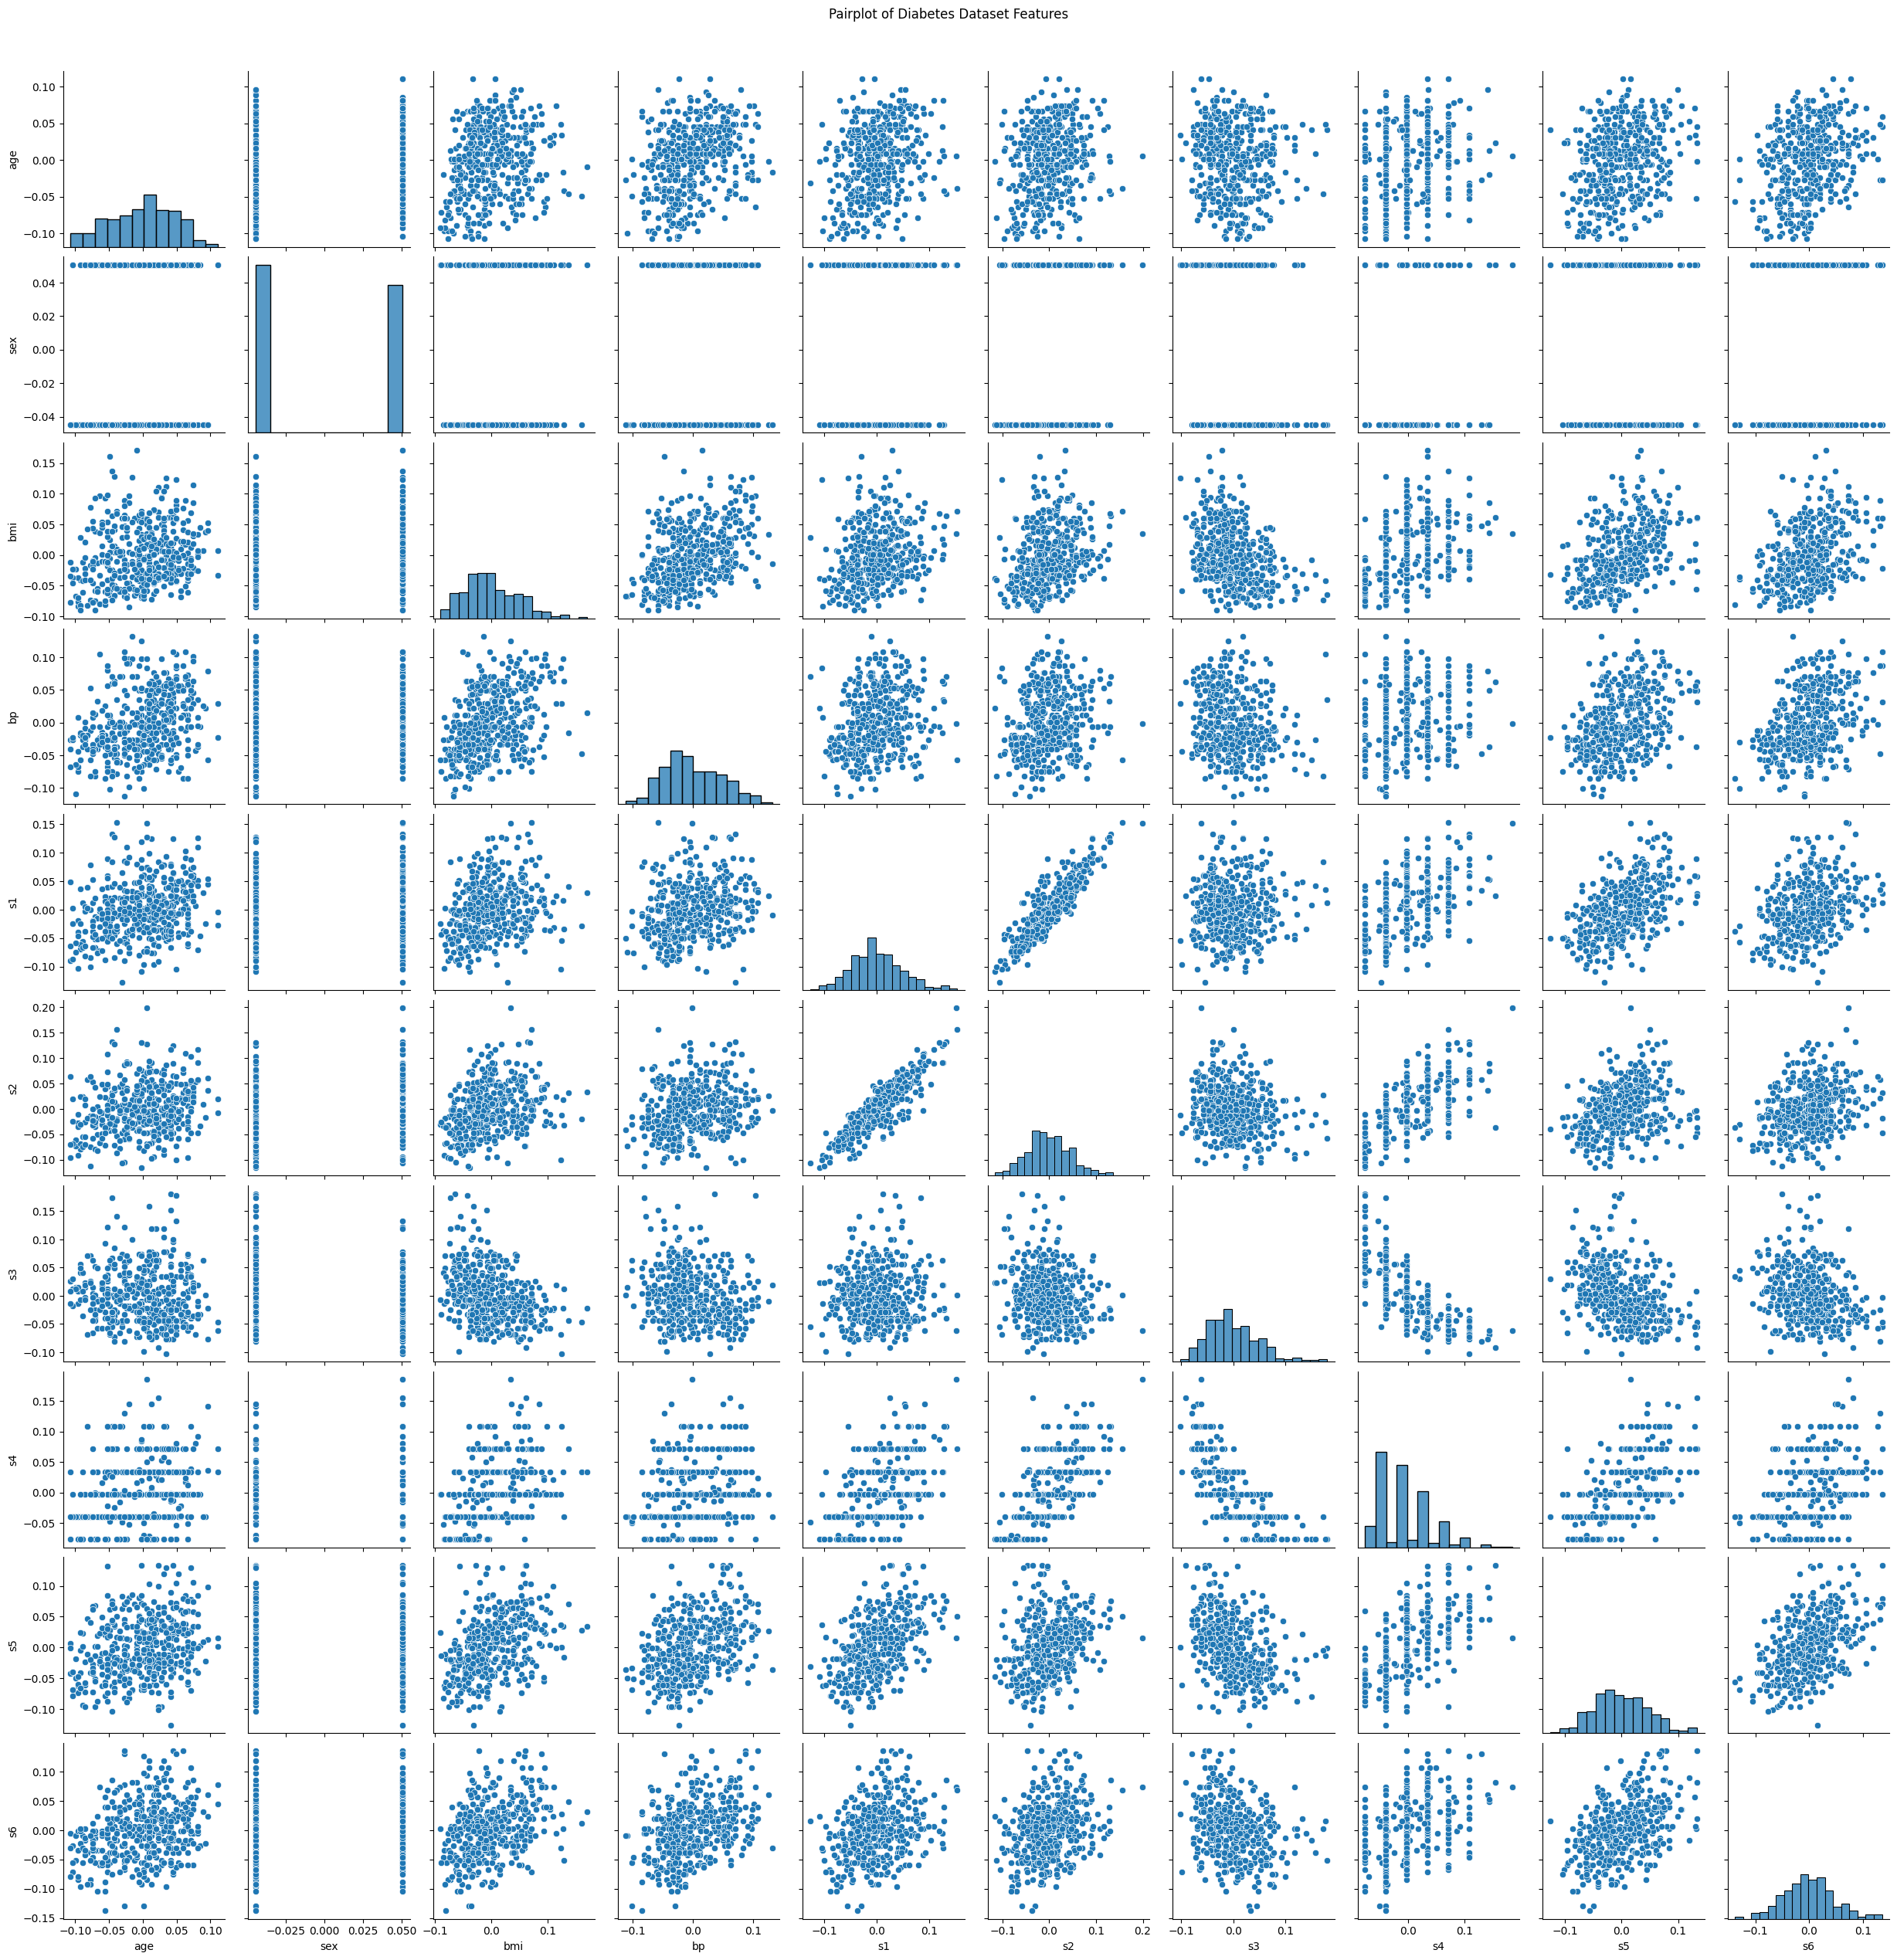

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.72      0.65        43
           1       0.24      0.30      0.27        20
           2       0.79      0.56      0.66        48

    accuracy                           0.58       111
   macro avg       0.54      0.53      0.53       111
weighted avg       0.62      0.58      0.59       111



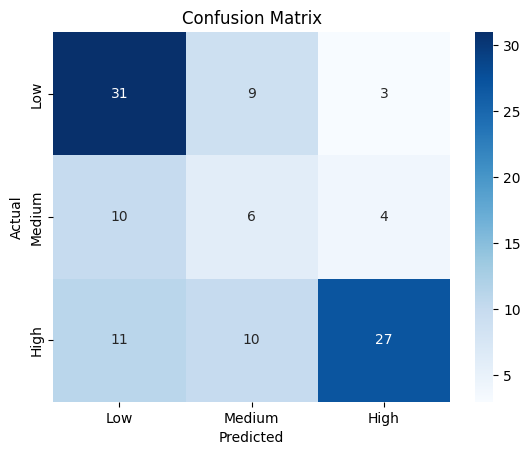

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load the Diabetes dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name='target')

# Bin the target variable into 3 classes (Low, Medium, High)
y_binned = pd.cut(y, bins=[-np.inf, 100, 150, np.inf], labels=[0, 1, 2])

# Display the first few rows of the dataset
print(X.head())
print(y_binned.head())

# Dataset information
X.info()
X.describe()

# Check for null values
print(X.isna().sum())

# Exploratory Data Analysis (EDA)
# Histograms for each feature
X.hist(figsize=(12, 10))
plt.suptitle("Histograms of Diabetes Dataset Features")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Pairplot for feature relationships
sns.pairplot(X)
plt.suptitle("Pairplot of Diabetes Dataset Features", y=1.02)
plt.show()

# Preprocessing: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_binned, test_size=0.25, random_state=42)

# Model Training: K-Nearest Neighbors Classifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()